In [1]:
import pandas            as pd 
import numpy             as np 
import matplotlib.pyplot as plt

In [2]:
#Generate 'random' data

np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5 #Array of 100 values with mean = 1.5 stddev=2.5
res = 0.5 * np.random.randn(100)     #Generate 100 residuals terms
y = 2 + 0.3 * X + res                #Atcual values of y

In [3]:
#Create pandas dataframe to store our X and y values
df = pd.DataFrame( {'X':X, 'y': y} )

In [4]:
#Show the first 5 rows
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [5]:
#Calculate the mean of x and y
xmean = np.mean(X)
ymean = np.mean(y)

#Calculate the terms needed for numerator and denominator of beta
df['xycov'] = ( df['X'] - xmean ) * ( df['y'] - ymean)
df['xvar'] = ( df['X'] - xmean)**2

#Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


In [7]:
#Make predictions
ypred = alpha + beta + X
ypred

array([ 8.23623756,  4.82649972,  6.27295166,  9.4283397 ,  8.49500167,
        1.382912  ,  6.20132774,  3.44771368,  3.56805957,  4.85260295,
        4.18621563,  7.46179047,  5.72870101,  4.13029424,  4.93576478,
        4.66029252,  7.56130438,  3.31321104,  4.60877595,  1.69086735,
       -2.55636784,  5.46015319,  5.9871972 ,  1.97069415,  9.50049326,
        0.19019251,  3.94050299,  3.35814707,  7.65805474,  7.49950362,
        4.21347526,  4.771513  ,  1.60664233, -1.12588447,  2.95632633,
        4.21697912,  6.9018334 ,  6.83205632,  2.85778966,  3.07034982,
        1.20472429,  0.27606186, -0.43956878,  8.70304519,  2.55197624,
        2.73092095,  0.6941183 ,  5.76983259, -0.20863792,  3.294256  ,
        1.5874403 ,  4.79336294,  2.54909386,  0.87452624,  3.75565113,
        4.89693638,  3.99239976,  4.58228644,  2.24030146,  2.91925378,
        2.14495558,  2.9272238 ,  1.79324099, -0.48959981,  4.26967205,
        2.82165436, -0.24938917,  4.98306234,  1.55786079,  3.95

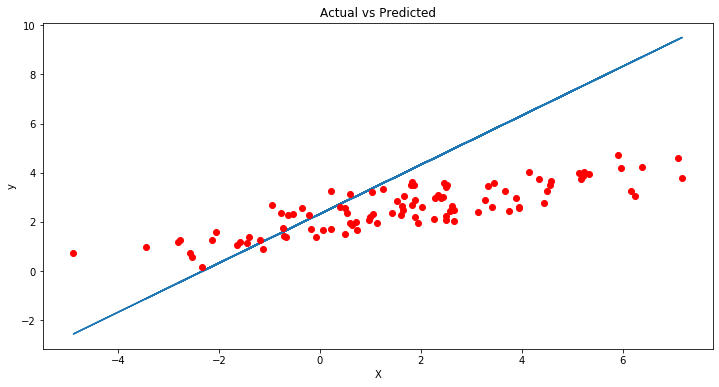

In [10]:
#Plot ypred against actual values of y
plt.figure(figsize=(12, 6))
plt.plot(X ,ypred) # Regression line
plt.plot(X, y, 'ro') #Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Linear Regression with Statsmodel

In [11]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
import statsmodels.formula.api as smf

#Initialise and fit linear regression model using statsmodel

model = smf.ols('sales ~ TV', data=advert)
model = model.fit()
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

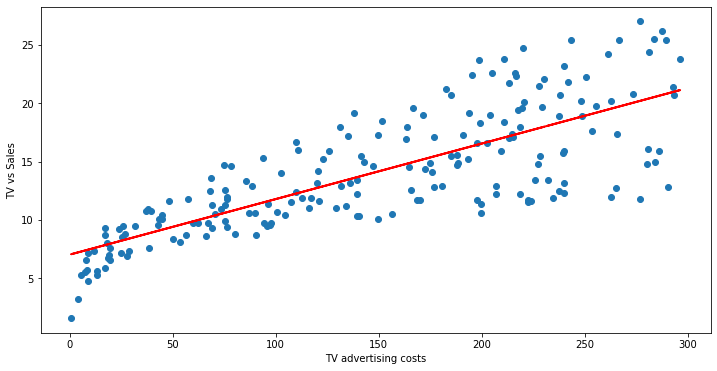

In [19]:
#Predict Values
sales_pred = model.predict()

#Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(advert['TV'], advert['sales'], 'o')         #Scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', linewidth=2) #regression line
plt.xlabel('TV advertising costs')
plt.ylabel('TV vs Sales')

plt.show()

In [20]:
new_X = 400
model.predict({"TV": new_X})

0    26.04725
dtype: float64

## Linear Regression with Scikit-learn 

In [21]:
from sklearn.linear_model import LinearRegression

#Build linear regression model using TV and Radio as predictors
#Split data into predictor X and output y

predictors = ['TV', 'radio']
X = advert[predictors]
y = advert['sales']

#initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


In [22]:
model.predict(X)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [23]:
#Example if we wanted to know how many sales we would make invested $300 in TV and $200 in Radio
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]
